In [1]:
!python --version

import logging
import sys

logging.basicConfig(
    format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
    datefmt='%H:%M:%S',
    level=logging.INFO)

Python 3.8.12


In [2]:
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='./data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.760 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.


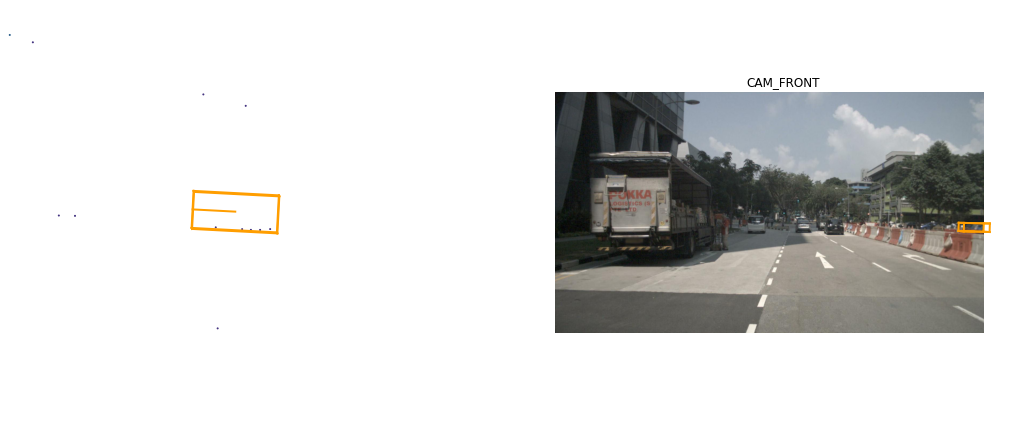

In [3]:
my_scene = nusc.scene[0]

my_sample = nusc.get('sample', my_scene['first_sample_token'])
nusc.get('sample_data', my_sample['data']['LIDAR_TOP'])

my_annotation = nusc.get('sample_annotation', my_sample['anns'][2])
nusc.render_annotation(my_sample['anns'][2])

In [4]:
from matplotlib import pyplot as plt
import imageio

class MyUtils():
    NUSCENE_HOME = "./data/sets/nuscenes/"

    def __init__(self, nusc):
        self.nusc = nusc

    def get_img(sample_data):
        path_to_im = MyUtils.NUSCENE_HOME + sample_data['filename']
        im = imageio.imread(path_to_im)            
        return im

    def convert_bin_to_pcd(bin_path):
        
        return 0

    def get_multi(self, frames_num, scene):
        first = self.nusc.get('sample', scene['first_sample_token'])
        rs = []

        cur = first
        # print(f"{cur}")
        for _ in range(frames_num):
            cur_token = cur['data']['CAM_FRONT']
            cur_sample = nusc.get('sample_data', cur_token)

            rs.append(MyUtils.get_img(cur_sample))            

            next_token = cur['next']
            if (not next_token):
                logging.info(f"No more next sample, last={cur['token']}")
                break

            cur = self.nusc.get('sample', next_token)
            
        return rs        



my_util = MyUtils(nusc)
rs = my_util.get_multi(1000, nusc.scene[1])

nusc.get('sample', nusc.scene[0]['first_sample_token'])
nusc.get('sample_data', '9d9bf11fb0e144c8b446d54a8a00184f')

# imageio.mimsave('./result.gif', rs)

20:36:36,790 root INFO No more next sample, last=281b92269fd648d4b52d06ac06ca6d65


{'token': '9d9bf11fb0e144c8b446d54a8a00184f',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '9d9bf11fb0e144c8b446d54a8a00184f',
 'calibrated_sensor_token': 'a183049901c24361a6b0b11b8013137c',
 'timestamp': 1532402927647951,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402927647951.pcd.bin',
 'prev': '',
 'next': '0cedf1d2d652468d92d23491136b5d15',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

In [5]:
from open3d import geometry, utility, visualization
import struct
import numpy as np

size_float = 4
list_pcd = []

with open('./data/sets/nuscenes/samples/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402927647951.pcd.bin', "rb") as f:
    byte = f.read(size_float * 4)
    while byte:
        x, y, z, intensity = struct.unpack("ffff", byte)
        list_pcd.append([x, y, z])
        byte = f.read(size_float * 4)

np_pcd = np.asarray(list_pcd)
pcd = geometry.PointCloud()

pcd.points = utility.Vector3dVector(np_pcd)

!export LIBGL_ALWAYS_INDIRECT=1
visualization.draw_geometries([pcd])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
